<a href="https://colab.research.google.com/github/pallavmarch/Regression-Analysis-Projects/blob/main/Sales_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import os

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor

In [2]:
!pip install kaggle

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d ashydv/advertising-dataset --unzip -p ./
import pandas as pd
df = pd.read_csv("advertising.csv")
df.head()

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/ashydv/advertising-dataset
License(s): unknown
  0% 0.00/1.83k [00:00<?, ?B/s]
100% 1.83k/1.83k [00:00<00:00, 2.95MB/s]


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# FUNCTIONS

In [13]:
def datacheck(data):

    table_data = []

    for i in data.columns:
      table_data.append([i, len(data[i].unique()), data[i].isna().sum(), data[i].dtypes])
    print(tabulate(table_data, headers=["Column", "Total Unique Values", "Missing Values","Data Type"], tablefmt="fancy_grid"))



def pairplt(a,b,data):

  plt.figure(figsize=(15,10))
  sns.pairplot(data, x_vars=a, y_vars=b, height=3)
  plt.show()

  return



def Correlaton(x):

  sns.heatmap(x.corr(), annot=True)
  plt.show()

  return



def mod(model,x_train_std, x_test_std, y_train, y_test):

    color_code = "\033[31m"   # Red
    reset_code = "\033[0m"    # default
    color_yellow = "\033[33m" #Yellow

    print(f"Model: {color_code}{model}{reset_code}")

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)


    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)


    print(f"Mean Squared Error (MSE): {color_yellow}{mse:.2f}{reset_code}")
    print(f"Root Mean Squared Error (RMSE): {color_yellow}{rmse:.2f}{reset_code}")
    print(f"Mean Absolute Error (MAE): {color_yellow}{mae:.2f}{reset_code}")
    print(f"R-squared (R²): {color_yellow}{r_squared:.2f}{reset_code}")


        # Check if model has intercept_ and coef_ attributes (for regression line plotting)
    if hasattr(model, 'intercept_') and hasattr(model, 'coef_') and x_test.shape[1] == 1:
        print(f"{color_yellow}Plotting regression line...{reset_code}")
        plt.scatter(x_test, y_test, label='True values', alpha=0.7)
        plt.plot(x_test, model.intercept_ + model.coef_[0] * x_test, 'r', label='Regression line')
        plt.title("Regression Line")
        plt.xlabel("Feature")
        plt.ylabel("Target")
        plt.legend()
        plt.show()

    return



def reg_graph(model,x,y):

  plt.scatter(x, y)
  plt.plot(x, model.intercept_ + model.coef_[0]*x, 'r')
  plt.show()

  return

# DATASET

In [4]:
datacheck(df)

╒═══════════╤═══════════════════════╤══════════════════╤═════════════╕
│ Column    │   Total Unique Values │   Missing Values │ Data Type   │
╞═══════════╪═══════════════════════╪══════════════════╪═════════════╡
│ TV        │                   190 │                0 │ float64     │
├───────────┼───────────────────────┼──────────────────┼─────────────┤
│ Radio     │                   167 │                0 │ float64     │
├───────────┼───────────────────────┼──────────────────┼─────────────┤
│ Newspaper │                   172 │                0 │ float64     │
├───────────┼───────────────────────┼──────────────────┼─────────────┤
│ Sales     │                   121 │                0 │ float64     │
╘═══════════╧═══════════════════════╧══════════════════╧═════════════╛


# Graphs

<Figure size 1500x1000 with 0 Axes>

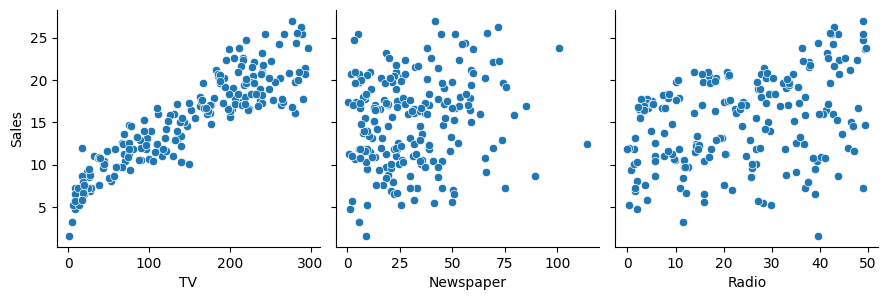

In [5]:
pairplt(['TV', 'Newspaper', 'Radio'],'Sales',df)

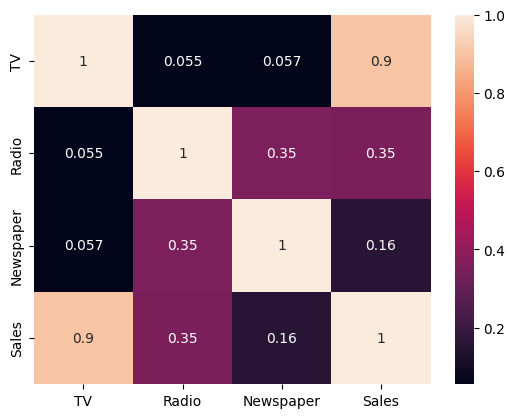

In [6]:
Correlaton(df)

We find sales and TV as to be most correlated

# Modelling

In [7]:
X = df[['TV']]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.2, random_state=99)

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)


--- Evaluating Linear Regression ---
Model: LinearRegression(n_jobs=-1)
Mean Squared Error (MSE): 4.04
Root Mean Squared Error (RMSE): 2.01
Mean Absolute Error (MAE): 1.63
R-squared (R²): 0.85
Plotting regression line...


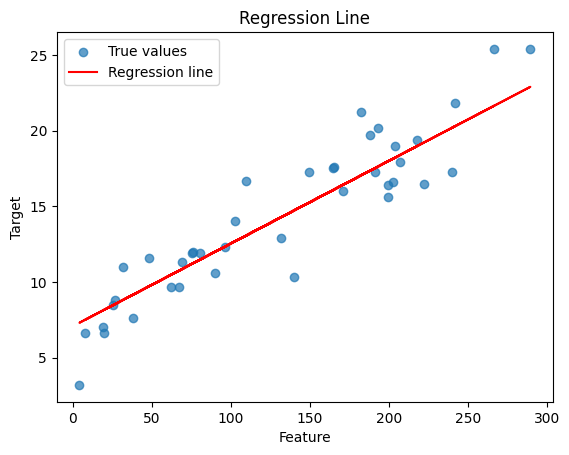


--- Evaluating Random Forest ---
Model: RandomForestRegressor(n_jobs=-1, random_state=42)
Mean Squared Error (MSE): 7.08
Root Mean Squared Error (RMSE): 2.66
Mean Absolute Error (MAE): 2.07
R-squared (R²): 0.74

--- Evaluating Support Vector Regressor ---
Model: SVR()
Mean Squared Error (MSE): 5.09
Root Mean Squared Error (RMSE): 2.26
Mean Absolute Error (MAE): 1.76
R-squared (R²): 0.81

--- Evaluating AdaBoost Regressor ---
Model: AdaBoostRegressor(random_state=42)
Mean Squared Error (MSE): 5.38
Root Mean Squared Error (RMSE): 2.32
Mean Absolute Error (MAE): 1.85
R-squared (R²): 0.80


In [14]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True, copy_X=True, n_jobs=-1),
    "Random Forest": RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1, random_state=42, n_jobs=-1),
    "Support Vector Regressor": SVR(kernel='rbf', degree=3, C=1.0, epsilon=0.1, gamma='scale'),
    "AdaBoost Regressor": AdaBoostRegressor( n_estimators=50, learning_rate=1.0, loss='linear', random_state=42)
}



for model_name, model in models.items():
    print(f"\n--- Evaluating {model_name} ---")
    mod(model, x_train_std, x_test_std, y_train, y_test)